Going to create a simple plot

In [20]:
%matplotlib inline

#adding necessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plot
import numpy as np

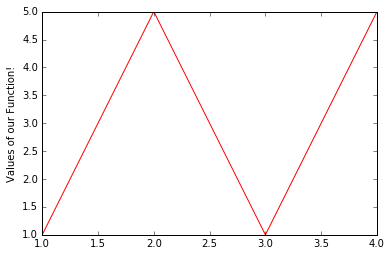

In [21]:
plot.ylabel("Values of our Function!")
plot.plot([1,2,3,4],[1,5,1,5],'r')
plot.show()

Creating a linear model

In [22]:
t = np.arange(1.,50.)

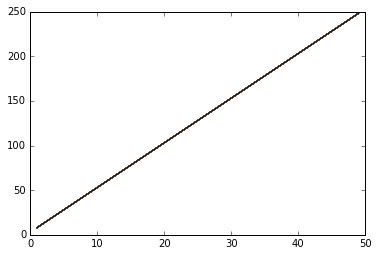

In [23]:
def f(t):
    return 5*t+3

for sec in t:
    plot.plot(t,f(t))

Same with lamda function

ValueError: x and y must have same first dimension

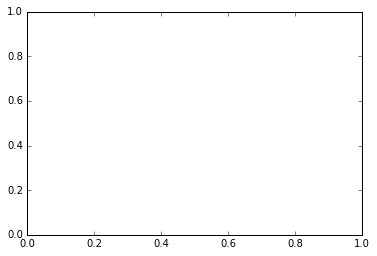

In [24]:
for sec in t:
    plot.plot(t,(lambda t: 5*t+3))

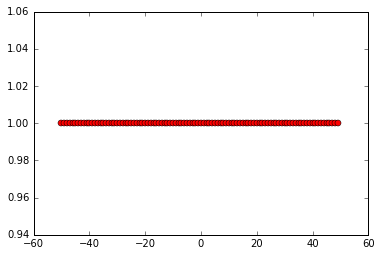

In [26]:
t = np.arange(-50.,50.)

for sec in t:
    plot.plot(sec,1,"ro")
    
plot.show()

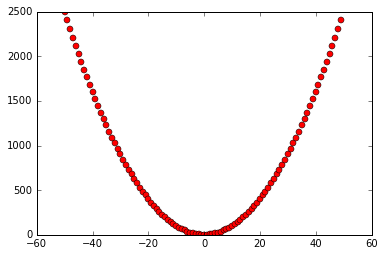

In [27]:
for x in t:
    plot.plot(x,x**2,"ro")

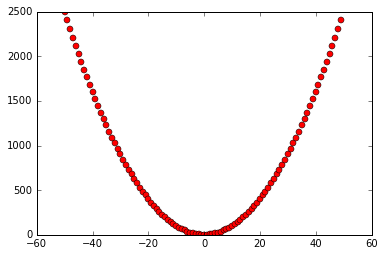

In [28]:
from scipy.optimize import minimize

for x in t:
    plot.plot(x,x**2,"ro")


In [29]:
function = lambda x: x**3

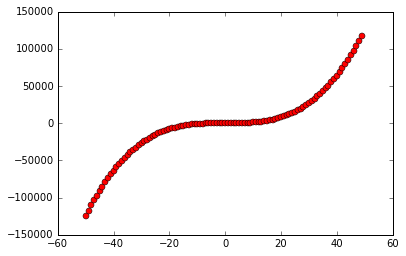

In [30]:
for x in t:
    plot.plot(x,function(x),'ro')

In [31]:
# Defining an arbitrary function that we will then minimize
def funct(x):
    return x**4-x**2+x-1

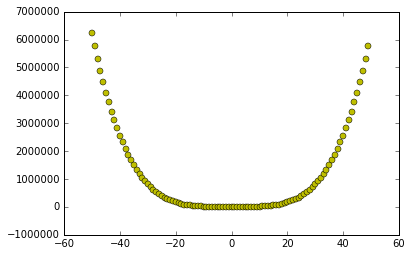

In [32]:
for x in t:    
    plot.plot(x,funct(x),'yo')

In [33]:
# our initial guess here will be bad, just to see how quickly it will work
minimum=minimize(funct,1000,method='Nelder-Mead',tol=1e-10)

In [34]:
print minimum.x

[-0.88464618]


In [35]:
print funct(minimum.x)

[-2.05478406]


In [36]:
# We can do the same thing with x^2 and see what we will have as a result
def quadratic(x):
    return x**2

quad_min=minimize(quadratic,10000000,method='Nelder-Mead',tol=1e-10)
print quad_min.x #0., we know this is correct because the analytic solution is zero

[ 0.]


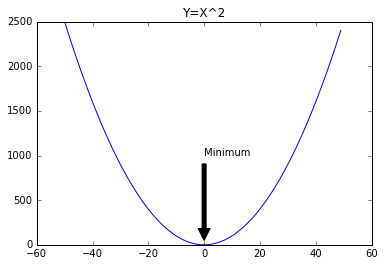

In [37]:
plot.plot(t,quadratic(t))
plot.title("Y=X^2")
plot.annotate("Minimum",xy=(quad_min.x,quadratic(quad_min.x)),xytext=(0,1000),arrowprops=dict(facecolor='black', shrink=0.05))

### Predictive model based on a linear curve

In [38]:
from sklearn import linear_model as lin_mod
linfit = lin_mod.LinearRegression()
linfit.fit([0,0],[1,0],[1,1],[2,1])

TypeError: fit() takes at most 4 arguments (5 given)

In [40]:
# We create a sample data set, the first half will be used for learning, and the next half for testing
x = np.arange(0.,50.,0.5)
y = np.arange(0.,100.,1.)

# The actual model here is y=2x

In [41]:
teachx = x[:50]
testx = x[50:]

teachy = y[:50]
testy = y[50:]

In [42]:
linfit.fit(teachx,teachy)

/site/x86/anaconda-1.8/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [ 1 50]

In [44]:
print teachx

[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5]


In [45]:
print teachy

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.]


In [46]:
print "The first data set is of size", teachx.size, "The second is of size", teachy.size #confirming that we're good

The first data set is of size 50 The second is of size 50


In [47]:
teachx = teachx.reshape(-1,1);teachy = teachy.reshape(-1,1) #if reshape is -1, it infers the proper values for shape
linfit.fit(teachx,teachy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
print linfit.coef_ #2, correct, this is y=2*x

[[ 2.]]


In [49]:
testx = testx.reshape(-1,1)
predicted = linfit.predict(testx).reshape(-1,1)

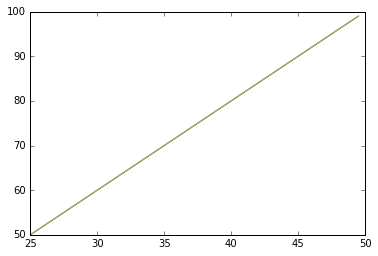

In [55]:
plot.plot(testx,predicted,"b-") # demonstrates the prediction was 100% accurate
plot.plot(testx,testy,"y-") #the two plots
plot.show() #comes out a mix of the two colors

### Creating a few data points, and predicting a model from them

In [62]:
x = np.linspace(-50.,50.,100)
y = np.arange(-50.,51.,1.) #does not include last data point
print "X", x
print "Y", y

# arange() produces more accurate results than does linspace()

X [-50.         -48.98989899 -47.97979798 -46.96969697 -45.95959596
 -44.94949495 -43.93939394 -42.92929293 -41.91919192 -40.90909091
 -39.8989899  -38.88888889 -37.87878788 -36.86868687 -35.85858586
 -34.84848485 -33.83838384 -32.82828283 -31.81818182 -30.80808081
 -29.7979798  -28.78787879 -27.77777778 -26.76767677 -25.75757576
 -24.74747475 -23.73737374 -22.72727273 -21.71717172 -20.70707071
 -19.6969697  -18.68686869 -17.67676768 -16.66666667 -15.65656566
 -14.64646465 -13.63636364 -12.62626263 -11.61616162 -10.60606061
  -9.5959596   -8.58585859  -7.57575758  -6.56565657  -5.55555556
  -4.54545455  -3.53535354  -2.52525253  -1.51515152  -0.50505051
   0.50505051   1.51515152   2.52525253   3.53535354   4.54545455
   5.55555556   6.56565657   7.57575758   8.58585859   9.5959596
  10.60606061  11.61616162  12.62626263  13.63636364  14.64646465
  15.65656566  16.66666667  17.67676768  18.68686869  19.6969697
  20.70707071  21.71717172  22.72727273  23.73737374  24.74747475
  25.75757

In [91]:
x = np.arange(-50.,51.,1.)
first_function = lambda val: val**3
print(first_function(3))

27


In [92]:
second_function = lambda val: val**3 + 6

In [93]:
print second_function(5)

131


In [94]:
first_domain = x[:50]
second_domain = x[50:]

In [95]:
first_range = vectorize(first_function(first_domain)) #not how vectorize works, should be called on numpy
print first_range

NameError: name 'vectorize' is not defined

In [ ]:
first_range = first_function(first_domain)
print first_range

In [ ]:
second_range = second_function(second_domain)
print second_range

In [96]:
for num in first_domain:
    print "Num:",num, "Value:", first_function(num)

Num: -50.0 Value: -125000.0
Num: -49.0 Value: -117649.0
Num: -48.0 Value: -110592.0
Num: -47.0 Value: -103823.0
Num: -46.0 Value: -97336.0
Num: -45.0 Value: -91125.0
Num: -44.0 Value: -85184.0
Num: -43.0 Value: -79507.0
Num: -42.0 Value: -74088.0
Num: -41.0 Value: -68921.0
Num: -40.0 Value: -64000.0
Num: -39.0 Value: -59319.0
Num: -38.0 Value: -54872.0
Num: -37.0 Value: -50653.0
Num: -36.0 Value: -46656.0
Num: -35.0 Value: -42875.0
Num: -34.0 Value: -39304.0
Num: -33.0 Value: -35937.0
Num: -32.0 Value: -32768.0
Num: -31.0 Value: -29791.0
Num: -30.0 Value: -27000.0
Num: -29.0 Value: -24389.0
Num: -28.0 Value: -21952.0
Num: -27.0 Value: -19683.0
Num: -26.0 Value: -17576.0
Num: -25.0 Value: -15625.0
Num: -24.0 Value: -13824.0
Num: -23.0 Value: -12167.0
Num: -22.0 Value: -10648.0
Num: -21.0 Value: -9261.0
Num: -20.0 Value: -8000.0
Num: -19.0 Value: -6859.0
Num: -18.0 Value: -5832.0
Num: -17.0 Value: -4913.0
Num: -16.0 Value: -4096.0
Num: -15.0 Value: -3375.0
Num: -14.0 Value: -2744.0
Num: 

In [101]:
for num in second_domain:
    print "Num:",num, "Value:", second_function(num)
    
print second_function(second_domain)

Num: 0.0 Value: 6.0
Num: 1.0 Value: 7.0
Num: 2.0 Value: 14.0
Num: 3.0 Value: 33.0
Num: 4.0 Value: 70.0
Num: 5.0 Value: 131.0
Num: 6.0 Value: 222.0
Num: 7.0 Value: 349.0
Num: 8.0 Value: 518.0
Num: 9.0 Value: 735.0
Num: 10.0 Value: 1006.0
Num: 11.0 Value: 1337.0
Num: 12.0 Value: 1734.0
Num: 13.0 Value: 2203.0
Num: 14.0 Value: 2750.0
Num: 15.0 Value: 3381.0
Num: 16.0 Value: 4102.0
Num: 17.0 Value: 4919.0
Num: 18.0 Value: 5838.0
Num: 19.0 Value: 6865.0
Num: 20.0 Value: 8006.0
Num: 21.0 Value: 9267.0
Num: 22.0 Value: 10654.0
Num: 23.0 Value: 12173.0
Num: 24.0 Value: 13830.0
Num: 25.0 Value: 15631.0
Num: 26.0 Value: 17582.0
Num: 27.0 Value: 19689.0
Num: 28.0 Value: 21958.0
Num: 29.0 Value: 24395.0
Num: 30.0 Value: 27006.0
Num: 31.0 Value: 29797.0
Num: 32.0 Value: 32774.0
Num: 33.0 Value: 35943.0
Num: 34.0 Value: 39310.0
Num: 35.0 Value: 42881.0
Num: 36.0 Value: 46662.0
Num: 37.0 Value: 50659.0
Num: 38.0 Value: 54878.0
Num: 39.0 Value: 59325.0
Num: 40.0 Value: 64006.0
Num: 41.0 Value: 68927.0

In [100]:
from sklearn.naive_bayes import GaussianNB as naive

In [109]:
first_data = first_function(first_domain)
second_data = second_function(second_domain)

print first_data.size, second_data.size

merged_data = np.concatenate(first_data,second_data)
# we will now teach the model our data, and try to predict other points


50 51


TypeError: only length-1 arrays can be converted to Python scalars

In [111]:
first_data = first_function(first_domain)
second_data = second_function(second_domain)

merged_data = np.concatenate([first_data,second_data])

In [113]:
print merged_data # this merged_data contains some data from one model, and some from another

[ -1.25000000e+05  -1.17649000e+05  -1.10592000e+05  -1.03823000e+05
  -9.73360000e+04  -9.11250000e+04  -8.51840000e+04  -7.95070000e+04
  -7.40880000e+04  -6.89210000e+04  -6.40000000e+04  -5.93190000e+04
  -5.48720000e+04  -5.06530000e+04  -4.66560000e+04  -4.28750000e+04
  -3.93040000e+04  -3.59370000e+04  -3.27680000e+04  -2.97910000e+04
  -2.70000000e+04  -2.43890000e+04  -2.19520000e+04  -1.96830000e+04
  -1.75760000e+04  -1.56250000e+04  -1.38240000e+04  -1.21670000e+04
  -1.06480000e+04  -9.26100000e+03  -8.00000000e+03  -6.85900000e+03
  -5.83200000e+03  -4.91300000e+03  -4.09600000e+03  -3.37500000e+03
  -2.74400000e+03  -2.19700000e+03  -1.72800000e+03  -1.33100000e+03
  -1.00000000e+03  -7.29000000e+02  -5.12000000e+02  -3.43000000e+02
  -2.16000000e+02  -1.25000000e+02  -6.40000000e+01  -2.70000000e+01
  -8.00000000e+00  -1.00000000e+00   6.00000000e+00   7.00000000e+00
   1.40000000e+01   3.30000000e+01   7.00000000e+01   1.31000000e+02
   2.22000000e+02   3.49000000e+02

In [123]:
predict = naive()
prop_x = x.reshape(-1,1)
prop_data = merged_data.reshape(-1,1)
predicted_values = predict.fit(prop_x,prop_data).predict(prop_x)

/site/x86/anaconda-1.8/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [124]:
print predicted_values-merged_data # either this fit was very good, or there is a problem, it displays no error here

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


### Using other models for fit (This is a cubic)

[[ 3.06684261]]


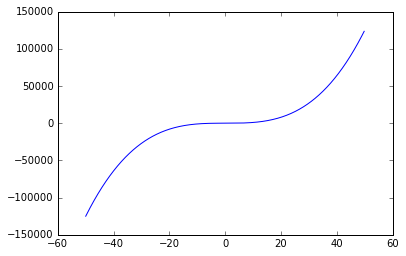

In [133]:
# using n-degree polynomials
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

degree = 3 #we want to guess a cubic (because we already know it is in fact cubic)

model = make_pipeline(PolynomialFeatures(degree),Ridge())
model.fit(prop_x,prop_data)

x_plot = np.arange(-50.,50.,0.2).reshape(-1,1)

y_plot = model.predict(x_plot).reshape(-1,1)
plot.plot(x_plot,y_plot)

print model.predict(0) #perfect, essentially created a curve between the two 